In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


In [2]:
df = pd.read_csv("/kaggle/input/world-university-rankings/cwurData.csv")

In [3]:
def checkData(dataframe):
    print("***************** İlk 5 Veri **********************")
    print(dataframe.head())
    
    print("***************** Veri Seti Hakkında Bilgi **********************")
    dataframe.info()
    
    print("***************** Veri Seti Hakkında Sayısal Veriler **********************")
    print(dataframe.describe().T)

checkData(df)

***************** İlk 5 Veri **********************
   world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  

In [4]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [5]:
df["broad_impact"].unique()

array([  nan,    1.,    4.,    2.,   13.,   12.,    7.,   18.,   41.,
         19.,   23.,   24.,   26.,   10.,    6.,   51.,   31.,   86.,
          3.,   16.,  151.,   27.,  107.,   28.,   15.,    9.,   68.,
         74.,   21.,    8.,    5.,  266.,  311.,  295.,   62.,  137.,
         17.,  380.,   89.,   32.,   56.,  132.,   22.,   33.,   37.,
        361.,   29.,  102.,   54.,  121.,  144.,  155.,   46.,   50.,
         63.,   94.,   77.,  238.,  215.,   34.,   66.,   59.,   40.,
        112.,   36.,   79.,   73.,   70.,   97.,   48.,  101.,   81.,
        162.,   49.,  145.,  207.,  124.,  180.,  326.,   45.,   99.,
         30.,  251.,  100.,  106.,  195.,  472.,  211.,   90.,   88.,
        110.,  118.,  306.,  293.,  192.,   61.,   64.,  129.,   92.,
        114.,  158.,  135.,   44.,  126.,  164.,  437.,  176.,  318.,
        141.,  117.,  196.,  355.,  917.,  173.,  628.,  415.,  224.,
        203.,  185.,  230.,  160.,  128.,  234.,  339.,  161.,  201.,
        290.,  247.,

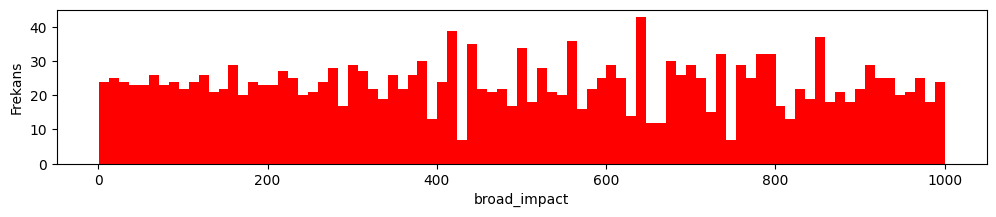

In [6]:
plt.figure(figsize=(12,2))
plt.hist(df["broad_impact"], bins=85, color = "red")
plt.xlabel("broad_impact")
plt.ylabel("Frekans")
plt.show()

In [7]:
nan_ratio = df['broad_impact'].isnull().mean() * 100
print(f"NaN oranı: %{nan_ratio:.2f}")

NaN oranı: %9.09


In [8]:
df['broad_impact'] = df['broad_impact'].fillna(df['broad_impact'].mode()[0])

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

world_rank              1000
institution             1024
country                   59
national_rank            229
quality_of_education     367
alumni_employment        565
quality_of_faculty       199
publications             987
influence                944
citations                135
broad_impact             343
patents                  738
score                    764
year                       4
dtype: int64

<Axes: >

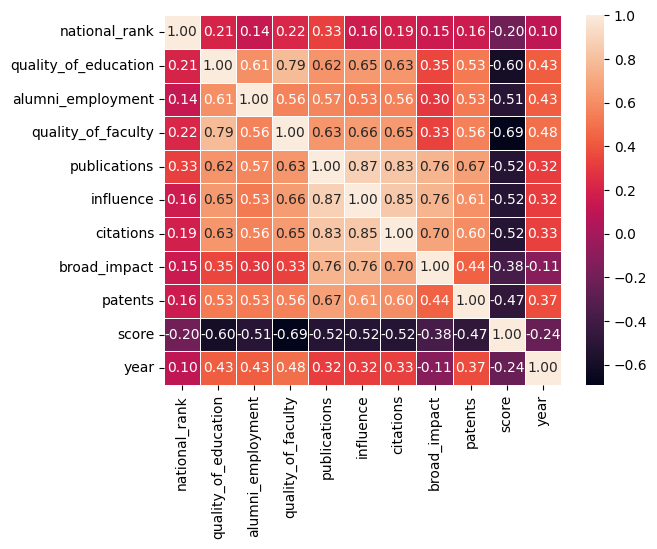

In [11]:
num_col = df.iloc[:,3:14]
num_col_corr = num_col.corr()
sns.heatmap(num_col_corr, annot=True, fmt = ".2f", linewidths=0.5)

# **En Çok üniversiteye sahip ilk 15 ülke**

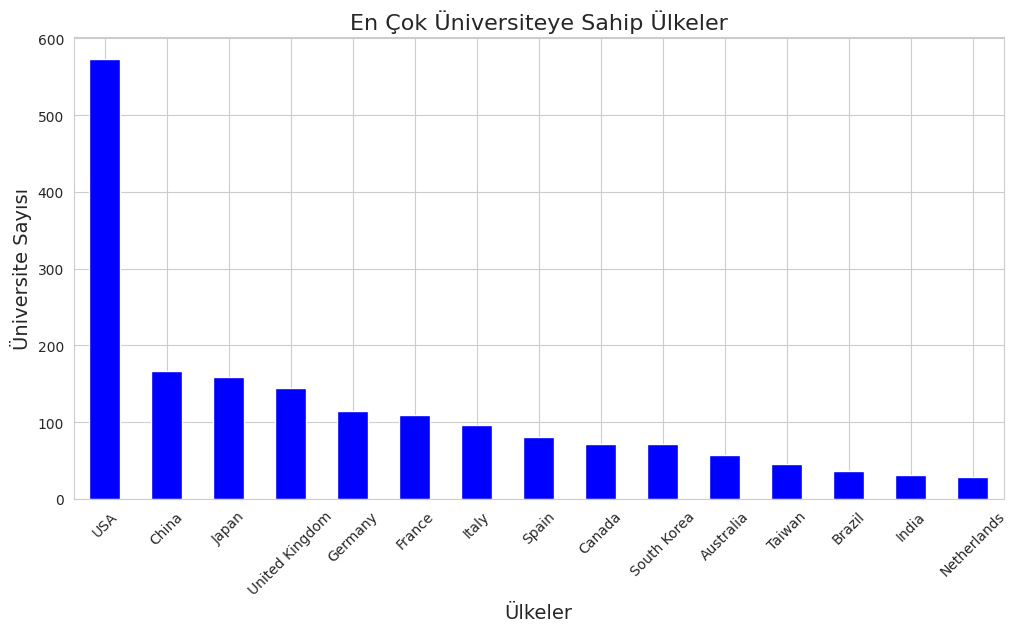

In [12]:
country_counts = df["country"].value_counts().head(15)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
country_counts.plot(kind="bar", color='blue')
plt.title("En Çok Üniversiteye Sahip Ülkeler", fontsize=16)
plt.xlabel("Ülkeler", fontsize=14)
plt.ylabel("Üniversite Sayısı", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# **En çok yayın yapan 10 üniversite**

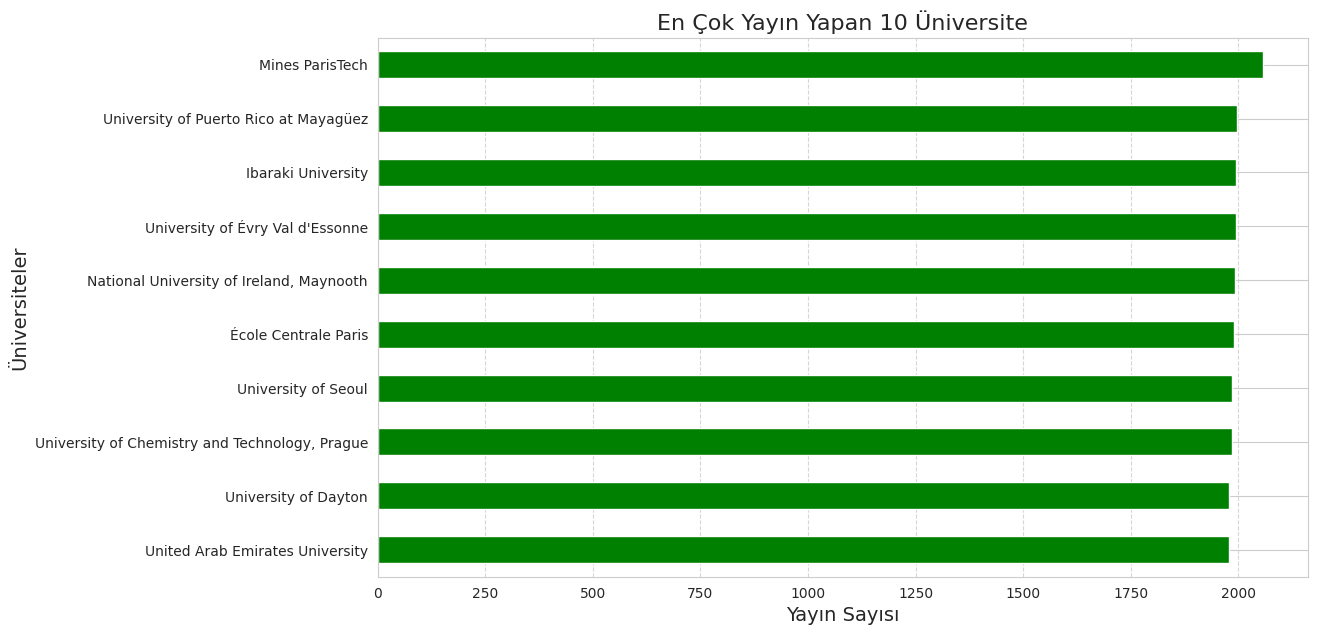

In [13]:
top_universities = (df.groupby('institution')['publications'].sum().sort_values(ascending=False).head(10))
plt.figure(figsize=(12, 7))
top_universities.plot(kind='barh', color="green")
plt.title("En Çok Yayın Yapan 10 Üniversite", fontsize=16)
plt.xlabel("Yayın Sayısı", fontsize=14)
plt.ylabel("Üniversiteler", fontsize=14)
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.show()

# **En iyi 10 Türk Üniversitesi**

In [14]:
df.country.unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', 'China', 'Taiwan', 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [15]:
mask = df.country == 'Turkey' 
masked_df = df[mask].head(10)
masked_df[['world_rank','institution','country','national_rank']]

,world_rank,institution,country,national_rank
595,396,Middle East Technical University,Turkey,1
801,602,Istanbul University,Turkey,2
854,655,Hacettepe University,Turkey,3
972,773,Istanbul Technical University,Turkey,4
987,788,Ankara University,Turkey,5
1007,808,Ege University,Turkey,6
1055,856,Bilkent University,Turkey,7
1099,900,Gazi University,Turkey,8
1102,903,Boğaziçi University,Turkey,9
1133,934,Dokuz Eylül University,Turkey,10
